In [2]:
import pandas as pd

FILE_PATHS = ["stations_2012_2021_NH3_NO2_PM10_PM25_formatted/NL10131_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/NL10444_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/NL10538_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/NL10633_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/NL10738_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/NL10929_2012_2021.csv"]

STATION_NAMES = ["NL10131",
                 "NL10444",
                 "NL10538",
                 "NL10633",
                 "NL10738",
                 "NL10929"]

# read the data from the csv files
data = [pd.read_csv(FILE_PATHS[i]) for i in range(len(FILE_PATHS))]

# add all relevant columns to the data
for j in range(len(data)):
    data[j]["date_time"] = pd.to_datetime(data[j]["Begindatumtijd"])
    data[j]["day_of_week"] = data[j]["date_time"].dt.day_of_week
    data[j]["day_of_year"] = data[j]["date_time"].dt.day_of_year
    data[j]["year"] = data[j]["date_time"].dt.year
    data[j]["hour"] = data[j]["date_time"].dt.hour

# fill NaN values by interpolation
for k in range(len(data)):
    data[k]['NH3'] = data[k]['NH3'].interpolate(method='linear', limit_direction='both')

data[0]

,Begindatumtijd,NH3,NO2,PM10,Lat,Lon,Station,date_time,day_of_week,day_of_year,year,hour
0,2012/01/01 00:00,5.160,8.33,26.810,51.54052,5.85307,NL10131,2012-01-01 00:00:00,6,1,2012,0
1,2012/01/01 01:00,5.160,7.89,23.558,51.54052,5.85307,NL10131,2012-01-01 01:00:00,6,1,2012,1
2,2012/01/01 02:00,5.160,6.03,18.314,51.54052,5.85307,NL10131,2012-01-01 02:00:00,6,1,2012,2
3,2012/01/01 03:00,5.160,4.81,7.070,51.54052,5.85307,NL10131,2012-01-01 03:00:00,6,1,2012,3
4,2012/01/01 04:00,5.160,4.53,10.070,51.54052,5.85307,NL10131,2012-01-01 04:00:00,6,1,2012,4
...,...,...,...,...,...,...,...,...,...,...,...,...
87667,2021/12/31 19:00,4.123,7.62,13.390,51.54052,5.85307,NL10131,2021-12-31 19:00:00,4,365,2021,19
87668,2021/12/31 20:00,3.795,7.46,13.390,51.54052,5.85307,NL10131,2021-12-31 20:00:00,4,365,2021,20
87669,2021/12/31 21:00,4.022,7.07,18.510,51.54052,5.85307,NL10131,2021-12-31 21:00:00,4,365,2021,21
87670,2021/12/31 22:00,5.088,7.18,13.390,51.54052,5.85307,NL10131,2021-12-31 22:00:00,4,365,2021,22


In [3]:
# MANURE
manure_season = pd.DatetimeIndex({})
manure_season = manure_season.append([
    pd.date_range(start="2022-02-15", end="2022-08-31"),
    pd.date_range(start="2021-02-15", end="2021-08-31"),
    pd.date_range(start="2020-02-15", end="2020-08-31"),
    pd.date_range(start="2019-02-15", end="2019-08-31"),
    pd.date_range(start="2018-02-15", end="2018-08-31"),
    pd.date_range(start="2017-02-15", end="2017-08-31"),
    pd.date_range(start="2016-02-15", end="2016-08-31"),
    pd.date_range(start="2015-02-15", end="2015-08-31"),
    pd.date_range(start="2014-02-15", end="2014-08-31"),
    pd.date_range(start="2013-02-15", end="2013-08-31"),
    pd.date_range(start="2012-02-15", end="2012-08-31")
])

all_manure_data = [pd.DataFrame() for _ in range(len(data))]
for a in range(len(data)):
    all_manure_data[a] = data[a][data[a]['date_time'].isin(manure_season)]

# all_manure_data[0]

manure_data = [pd.DataFrame() for _ in range(len(data))]
for b in range(len(data)):
    manure_data[b] = all_manure_data[b].groupby('day_of_year')['NH3'].mean()


In [4]:
# NO MANURE
no_manure_season = pd.DatetimeIndex({})
no_manure_season = no_manure_season.append([
    pd.date_range(start="2022-08-31", end="2022-12-31"),
    pd.date_range(start="2021-08-31", end="2022-02-15"),
    pd.date_range(start="2020-08-31", end="2021-02-15"),
    pd.date_range(start="2019-08-31", end="2020-02-15"),
    pd.date_range(start="2018-08-31", end="2019-02-15"),
    pd.date_range(start="2017-08-31", end="2018-02-15"),
    pd.date_range(start="2016-08-31", end="2017-02-15"),
    pd.date_range(start="2015-08-31", end="2016-02-15"),
    pd.date_range(start="2014-08-31", end="2015-02-15"),
    pd.date_range(start="2013-08-31", end="2014-02-15"),
    pd.date_range(start="2012-08-31", end="2013-02-15"),
    pd.date_range(start="2012-01-01", end="2012-02-15")
])

all_no_manure_data = [pd.DataFrame() for _ in range(len(data))]
for a in range(len(data)):
    all_no_manure_data[a] = data[a][data[a]['date_time'].isin(no_manure_season)]

# all_no_manure_data[0]

no_manure_data = [pd.DataFrame() for _ in range(len(data))]
for b in range(len(data)):
    no_manure_data[b] = all_no_manure_data[b].groupby('day_of_year')['NH3'].mean()

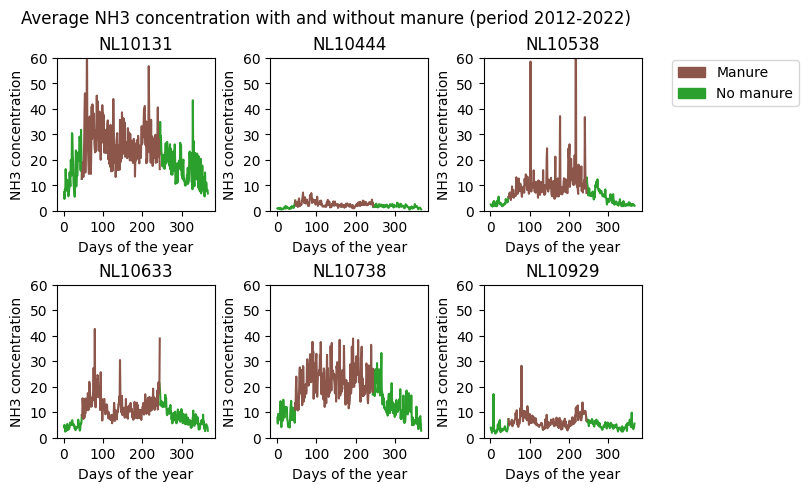

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = [
    "tab:blue",
    "tab:orange",
    "tab:green",
    "tab:red",
    "tab:purple",
    "tab:brown"
]

yticks = [a * 10 for a in range(7)]
xticks = [b * 100 for b in range(4)]

fig, axes = plt.subplots(nrows=2, ncols=3, constrained_layout=True)
for c, ax in enumerate(axes.flat):
    ax.plot(no_manure_data[c][:(31+15)], color="tab:green")
    ax.plot(no_manure_data[c][(31+15):], color="tab:green")
    ax.plot(manure_data[c], color="tab:brown")
    ax.set_title(STATION_NAMES[c])
    ax.set_xlabel("Days of the year")
    ax.set_ylabel("NH3 concentration")
    # ax.annotate("Avg manure: "+str(manure_data[c].mean()), xy=(0,0))
    # ax.annotate("Average no manure: "+str(no_manure_data[c].mean()), xy=(0,0))
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)
    ax.set_ybound(0, 60)
    
patches = [
    mpatches.Patch(color='tab:brown', label='Manure'),
    mpatches.Patch(color='tab:green', label='No manure')
]

fig.suptitle("Average NH3 concentration with and without manure (period 2012-2022)")
fig.legend(handles=patches, bbox_to_anchor=(1.25, 0.9))
plt.show()

In [12]:
# averages

print("---------- Average concentration with and without manure ----------")
print("Period 2012-2022\n")
print("Station\tManure\tAverage concentration")

for f in range(len(data)):
    print(STATION_NAMES[f], end='')
    print("\tFalse\t"+str(no_manure_data[f].mean()))
    print("\t\tTrue\t"+str(manure_data[f].mean()))

---------- Average concentration with and without manure ----------
Period 2012-2022

Station	Manure	Average concentration
NL10131	False	16.314099232244338
		True	26.74072209408074
NL10444	False	1.6256933244233243
		True	2.7983687887522284
NL10538	False	4.4119546278697666
		True	10.8294250747463
NL10633	False	7.196403414902116
		True	12.767066147378591
NL10738	False	11.87142052551881
		True	22.742120991216026
NL10929	False	4.545889003282744
		True	6.774042977308785
